In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import copy

In [2]:
df = pd.read_csv('k-means-dataset.csv', sep = "\t", header=None)

In [3]:
df.columns = ['x','y']

In [4]:
df

,x,y
0,"1,84207953112616","4,60757160448228"
1,"5,65858312061882","4,79996405444154"
2,"6,35257892020234","3,29085449875427"
3,"2,90401652528136","4,61220411281507"
4,"3,23197915720744","4,93989405282630"
...,...,...
295,"7,30278708280303","3,38015978852108"
296,"6,99198434061175","2,98706728722547"
297,"4,82553409551138","2,77961663918051"
298,"6,11768055015372","2,85475655216480"


In [5]:
df['x'] = df['x'].apply(lambda x: x.replace(',','.'))
df['y'] = df['y'].apply(lambda x: x.replace(',','.'))

In [6]:
df['x'] = df['x'].apply(float)
df['y'] = df['y'].apply(float)

In [7]:
df

,x,y
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894
...,...,...
295,7.302787,3.380160
296,6.991984,2.987067
297,4.825534,2.779617
298,6.117681,2.854757


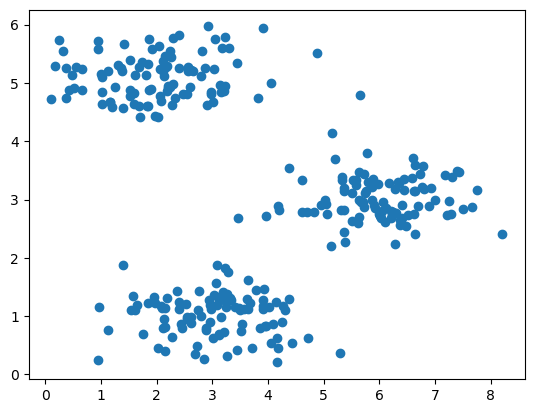

In [8]:
plt.scatter(df['x'], df['y'])

In [9]:
class MyKMeans:

    def __init__(self, n_clusters):
        self.n_clusters = n_clusters
        self.clustered_data = [ [] for i in range(self.n_clusters) ]
        self.centroids  = []
        self.iterations = 0

    def ecludian_distance (self, X1, X2):
        return np.linalg.norm(X1 - X2)

    
    def fit(self, X):
        self.centroids = np.random.uniform(
            X.min().min(), X.max().max(), size=(self.n_clusters, X.shape[1])
        )
        self.temporary_centroids = copy.deepcopy(self.centroids)
        
        while True:
            self.clustered_data = [ [] for i in range(self.n_clusters) ]
            self.iterations += 1
            
            for value in X.values:
                distance = []
                for centroid in self.centroids:
                    distance.append(self.ecludian_distance(value, centroid))
                index = np.argmin(distance)
                
                self.clustered_data[index].append(value)

            for count in range(len(self.centroids)):
                self.centroids[count] = np.average(self.clustered_data[count], axis = 0)
            
            
            if np.array_equal(self.temporary_centroids, self.centroids):
                self.iterations -= 1
                break
            else:
                self.temporary_centroids = copy.deepcopy(self.centroids)

    def calculate_inertia(self):
        total = 0.0
        for k, centroid in enumerate(self.centroids):
            cluster_points = np.array(self.clustered_data[k])
            if cluster_points.size == 0:
                continue
            diff = cluster_points - centroid   
            total += np.sum(diff ** 2)     
        return float(total)
        
    def predict(self, X):
        result = []
        for point in X.values:
            distance = []
            for centroid in self.centroids:
                distance.append(self.ecludian_distance(centroid, point))
            cluster = np.argmin(distance)
            result.append(cluster)
            
        return result

In [12]:
X = df[['x','y']]

1 1
2 2
3 3
4 8
5 4


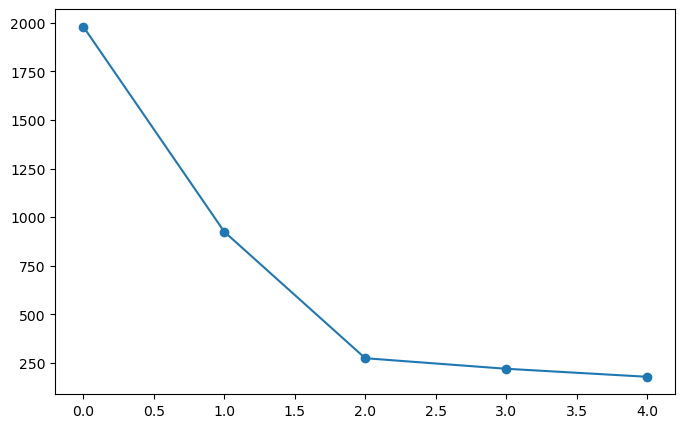

In [13]:
sse = []  

for k in range(1, 6):
        kmeans = MyKMeans(n_clusters=k)
        kmeans.fit(X)
        print(k, kmeans.iterations)
        sse.append(kmeans.calculate_inertia())  

plt.figure(figsize=(8, 5))
plt.plot(sse, marker="o")
plt.show()

In [22]:
model = MyKMeans(3)
model.fit(X)

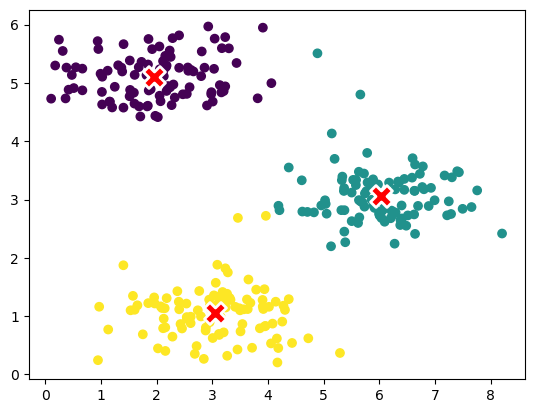

In [24]:
model = MyKMeans(3)
model.fit(X)

plt.scatter(df['x'], df['y'], c = df['my_pred'])
centroids = model.centroids
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker="X", s=250, c="red", edgecolors="white", linewidths=2,
            label="Centroids")


In [18]:
model.iterations

3

In [19]:
df['my_pred'] = model.predict(X)

In [20]:
df

,x,y,my_pred
0,1.842080,4.607572,0
1,5.658583,4.799964,1
2,6.352579,3.290854,1
3,2.904017,4.612204,0
4,3.231979,4.939894,0
...,...,...,...
295,7.302787,3.380160,1
296,6.991984,2.987067,1
297,4.825534,2.779617,1
298,6.117681,2.854757,1


In [27]:
centers = model.centroids
data =  [4.888043, 5.506708]
np.linalg.norm(centers[0] - data)

np.float64(2.9564108780422833)

In [26]:
model.centroids

array([[1.95899726, 5.10538976],
       [3.04367119, 1.05413761],
       [6.03366736, 3.05866058]])

In [28]:
np.linalg.norm(centers[1] - data)

np.float64(4.819449182971727)

In [29]:
np.linalg.norm(centers[2] - data)

np.float64(2.702848740221301)

In [30]:
from sklearn.cluster import KMeans

modelpy = KMeans(n_clusters=3)
modelpy.fit(X)
df['lib_pred'] = modelpy.predict(X)

C:\Users\ufml\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\ufml\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\ufml\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ufml\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^

In [31]:
df

,x,y,my_pred,lib_pred
0,1.842080,4.607572,0,0
1,5.658583,4.799964,1,1
2,6.352579,3.290854,1,1
3,2.904017,4.612204,0,0
4,3.231979,4.939894,0,0
...,...,...,...,...
295,7.302787,3.380160,1,1
296,6.991984,2.987067,1,1
297,4.825534,2.779617,1,1
298,6.117681,2.854757,1,1


AttributeError: 'MyKMeans' object has no attribute 'cluster_centers_'

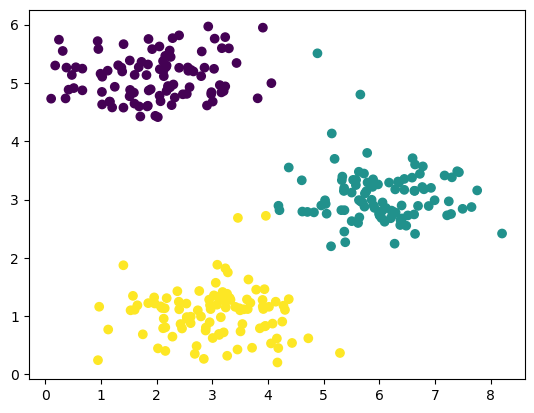

In [32]:
plt.scatter(df['x'], df['y'], c = df['lib_pred'])
centroids = model2.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker="X", s=250, c="red", edgecolors="white", linewidths=2,
            label="Centroids")


C:\Users\ufml\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ufml\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ufml\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ufml\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

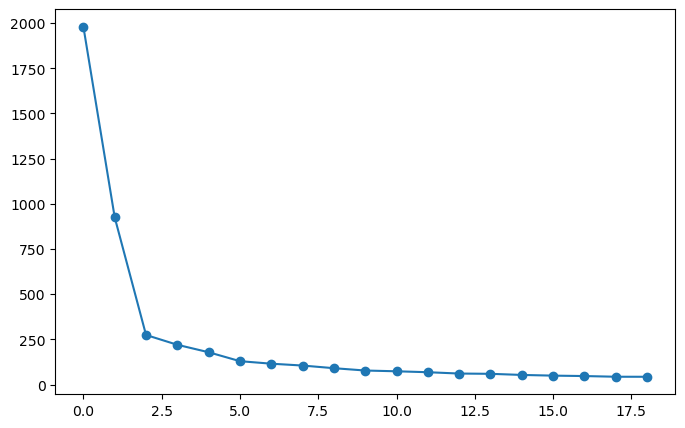

In [33]:
sse = []  

for k in range(1, 20):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        sse.append(kmeans.inertia_)  

plt.figure(figsize=(8, 5))
plt.plot(sse, marker="o")
plt.show()